In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # ✅ Add this instead of using input_shape in Conv2D

    # Feature Extraction
    layers.Conv2D(32, (3,3), activation='relu'),  # No input_shape here
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Classification
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Load and split data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add channel dimension (since your model expects 28x28x1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, 
                    epochs=5, 
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/5


2025-06-17 20:46:55.775829: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8782 - loss: 0.4118

2025-06-17 20:48:57.450404: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 128s 129ms/step - accuracy: 0.8783 - loss: 0.4115 - val_accuracy: 0.9828 - val_loss: 0.0545
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 120s 128ms/step - accuracy: 0.9831 - loss: 0.0556 - val_accuracy: 0.9881 - val_loss: 0.0344
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 121s 129ms/step - accuracy: 0.9900 - loss: 0.0342 - val_accuracy: 0.9875 - val_loss: 0.0363
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 121ms/step - accuracy: 0.9920 - loss: 0.0261 - val_accuracy: 0.9910 - val_loss: 0.0284
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 113s 121ms/step - accuracy: 0.9940 - loss: 0.0205 - val_accuracy: 0.9901 - val_loss: 0.0283


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")  # Expected: ~99.0%

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9870 - loss: 0.0350
Test Accuracy: 99.01%


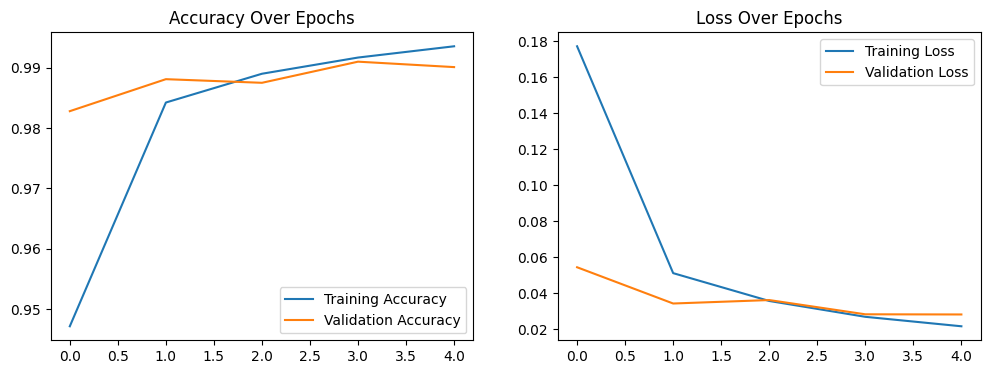

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

2025-06-17 22:20:53.498232: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step


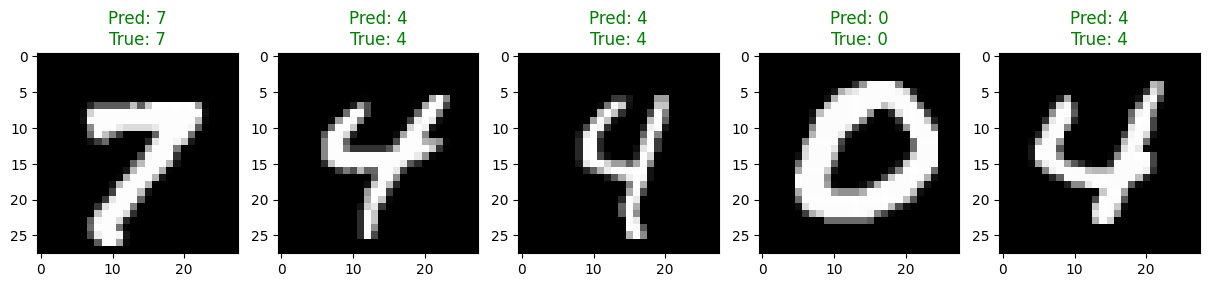

In [9]:
import numpy as np

predictions = model.predict(test_images)
sample_indices = np.random.choice(len(test_images), 5, replace=False)

plt.figure(figsize=(15,3))
for i, idx in enumerate(sample_indices):
    plt.subplot(1,5,i+1)
    plt.imshow(test_images[idx].reshape(28,28), cmap='gray')
    pred_label = np.argmax(predictions[idx])
    true_label = test_labels[idx]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color='green' if pred_label == true_label else 'red')
plt.show()